# Wie man Dateien in einem Ordner verarbeitet

In diesem Notebook werden wir eine Schleife programmieren, die einen Ordner mit Bildern durchläuft. Außerdem wird die Schleife eine Python-Funktion aufrufen, die die Bilder einzeln analysiert. Somit werden wir alle Bilder in diesem Ordner mit demselben Verfahren verarbeiten.

Siehe auch
* [Arbeiten mit Dateien in Python](https://realpython.com/working-with-files-in-python/)
* [Über Dateien in einem Verzeichnis iterieren](https://newbedev.com/how-to-iterate-over-files-in-a-given-directory)

In [1]:
import os
from skimage.io import imread
from matplotlib.pyplot import imshow, show
from skimage.io import imread
import numpy as np

Zu Demonstrationszwecken verwenden wir einen Ordner mit Bildern von Bananenscheiben, die mittels Magnetresonanztomographie aufgenommen wurden (Mit freundlicher Genehmigung von Nasreddin Abolmaali, OncoRay, TU Dresden)

In [2]:
# define the location of the folder to go through
directory = '../../data/banana/'

# get a list of files in that folder
file_list = os.listdir(directory)

file_list

['banana0002.tif',
 'banana0003.tif',
 'banana0004.tif',
 'banana0005.tif',
 'banana0006.tif',
 'banana0007.tif',
 'banana0008.tif',
 'banana0009.tif',
 'banana0010.tif',
 'banana0011.tif',
 'banana0012.tif',
 'banana0013.tif',
 'banana0014.tif',
 'banana0015.tif',
 'banana0016.tif',
 'banana0017.tif',
 'banana0018.tif',
 'banana0019.tif',
 'banana0020.tif',
 'banana0021.tif',
 'banana0022.tif',
 'banana0023.tif',
 'banana0024.tif',
 'banana0025.tif',
 'banana0026.tif',
 'image_source.txt']

Offensichtlich sind nicht nur Bilder in diesem Ordner. Wir können diese Liste mit einer kurzen for-Anweisung filtern:

In [3]:
image_file_list = [file for file in file_list if file.endswith(".tif")]

image_file_list

['banana0002.tif',
 'banana0003.tif',
 'banana0004.tif',
 'banana0005.tif',
 'banana0006.tif',
 'banana0007.tif',
 'banana0008.tif',
 'banana0009.tif',
 'banana0010.tif',
 'banana0011.tif',
 'banana0012.tif',
 'banana0013.tif',
 'banana0014.tif',
 'banana0015.tif',
 'banana0016.tif',
 'banana0017.tif',
 'banana0018.tif',
 'banana0019.tif',
 'banana0020.tif',
 'banana0021.tif',
 'banana0022.tif',
 'banana0023.tif',
 'banana0024.tif',
 'banana0025.tif',
 'banana0026.tif']

Alternativ können wir auch eine längere for-Schleife schreiben und prüfen, ob Dateien Bilder sind. Dieser Code macht genau dasselbe, er ist nur anders geschrieben.

In [4]:
# go through all files in the folder
for file in file_list:
    # if the filename is of a tif-image, print it out
    if file.endswith(".tif"):
        print(file)

banana0002.tif
banana0003.tif
banana0004.tif
banana0005.tif
banana0006.tif
banana0007.tif
banana0008.tif
banana0009.tif
banana0010.tif
banana0011.tif
banana0012.tif
banana0013.tif
banana0014.tif
banana0015.tif
banana0016.tif
banana0017.tif
banana0018.tif
banana0019.tif
banana0020.tif
banana0021.tif
banana0022.tif
banana0023.tif
banana0024.tif
banana0025.tif
banana0026.tif


Wie Sie oben sehen können, ist `image_file_list` eine Liste von Strings. Die Namen der Bilder in einer Liste zu speichern, bedeutet viel weniger Rechenleistung als die Bilder selbst in der Liste zu speichern. Es macht Sinn, die Bilder mit `imread` zum spätestmöglichen Zeitpunkt einzulesen, hier in der for-Schleife unten. Wenn Sie sich für Ordnerstrukturen und die Spezifizierung dieser Verzeichnisse interessieren, können Sie sich diese beiden Jupyter Notebooks ansehen [hier](https://github.com/BiAPoL/Quantitative_Bio_Image_Analysis_with_Python_2022/blob/main/docs/day1x_Folder_Structures/05_Folder_structures.ipynb) und [hier](https://github.com/BiAPoL/Quantitative_Bio_Image_Analysis_with_Python_2022/blob/main/docs/day1x_Folder_Structures/06_Folder_structures2.ipynb).

Um alle Bilder anzuzeigen, müssen wir sie aus dem richtigen `directory` öffnen:

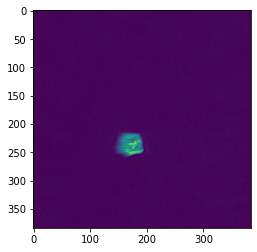

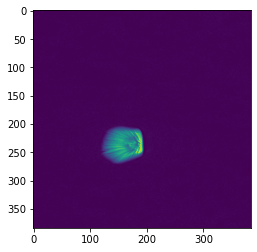

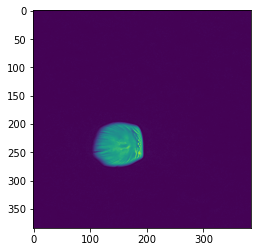

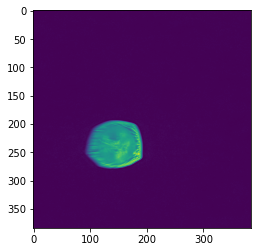

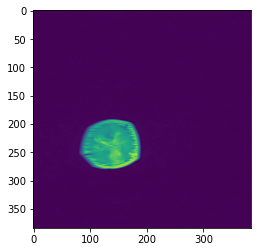

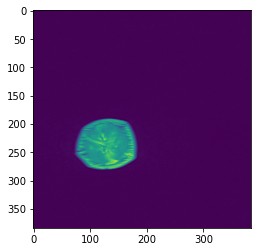

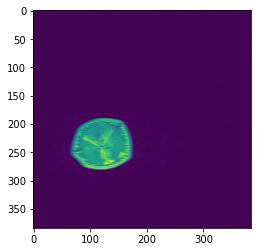

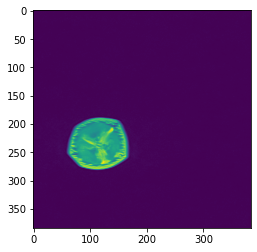

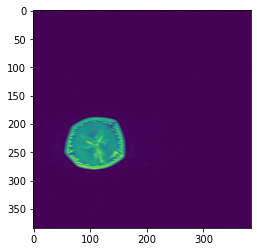

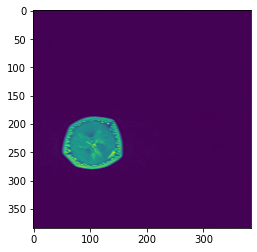

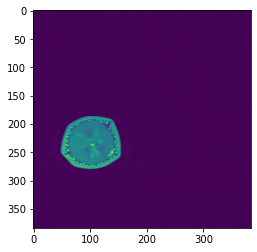

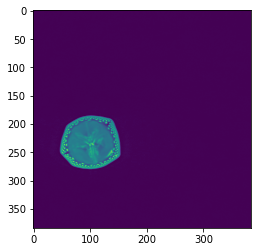

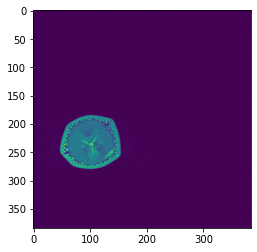

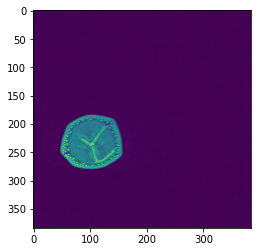

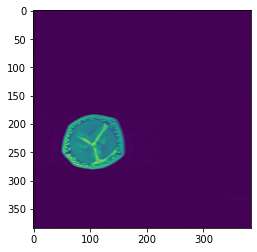

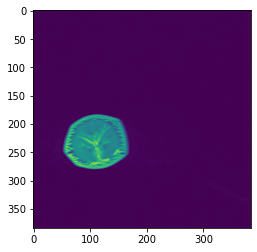

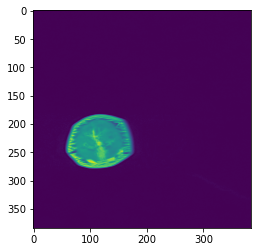

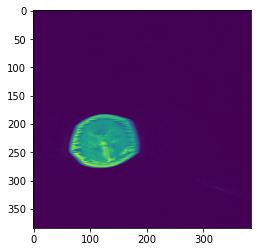

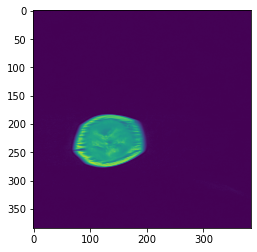

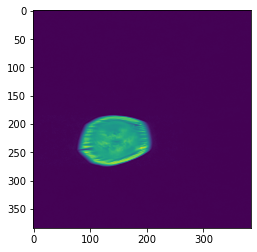

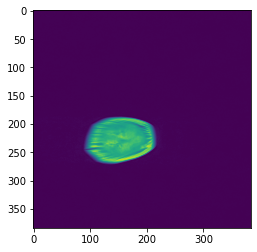

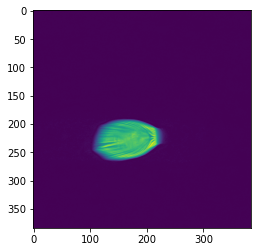

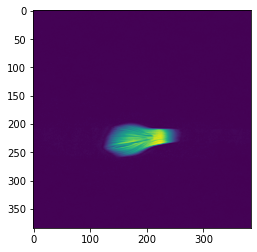

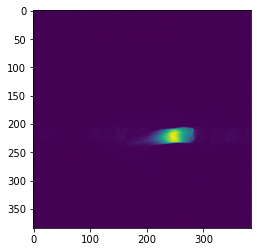

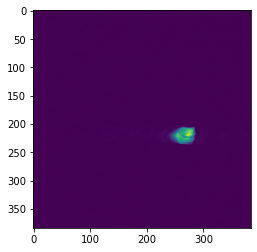

In [5]:
# go through all files in the folder
for image_file in image_file_list:
    image = imread(directory + image_file)
    imshow(image)
    show()

[Benutzerdefinierte Funktionen](https://nbviewer.jupyter.org/github/BiAPoL/Bio-image_Analysis_with_Python/blob/main/python_basics/09_custom_functions.ipynb) helfen uns, den Code organisiert zu halten. Zum Beispiel können wir Bildanalyse-Code in eine Funktion packen und diese dann einfach aufrufen:

In [6]:
def load_and_measure(filename):
    """
    This function opens an image and returns its mean intensity.
    """
    image = imread(filename)
    
    # return mean intensity in the image
    return np.mean(image)

# for testing
load_and_measure(directory + "banana0010.tif")

69.15106201171875

Mit einer solchen benutzerdefinierten Funktion können wir auch die Kurzform für das Schreiben von for-Schleifen nutzen:

In [7]:
mean_intensities_of_all_images = [load_and_measure(directory + file) for file in image_file_list]
mean_intensities_of_all_images

[12.94198947482639,
 25.04678683810764,
 39.627543131510414,
 49.71319580078125,
 56.322109646267364,
 60.08679877387153,
 63.94538031684028,
 66.04618326822917,
 69.15106201171875,
 70.85603162977431,
 74.40909152560764,
 77.48423936631944,
 81.77360026041667,
 85.44072129991319,
 91.22532823350694,
 94.36199951171875,
 98.47229682074652,
 99.3980712890625,
 102.34300401475694,
 101.50947401258681,
 97.14067247178819,
 80.13118489583333,
 49.77497694227431,
 28.36090766059028,
 18.806070963541668]

# Übung
Öffnen Sie alle Bilder des Bananendatensatzes, segmentieren Sie die Bilder und messen Sie den Schwerpunkt der Bananenscheiben in einer Tabelle. Schreiben Sie die Messergebnisse in "banana.csv".

Tipp: Anstelle des `imshow`-Befehls im letzten Beispiel führen Sie Ihren Bildverarbeitungs-Workflow aus. Richten Sie den Bildverarbeitungs-Workflow zuerst ein, z.B. in einer benutzerdefinierten Funktion. Programmieren Sie das Iterieren über Dateien in einem Ordner zuletzt, nachdem die Bildverarbeitung funktioniert.